In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [4]:
df = pd.read_csv('data/cleaned_data.csv')

In [5]:
# Remove commas and convert to float for specific columns
columns_to_convert = [
    "monthly_premium",
    "policy_value",
    "paid_premium",
    "total_premium",
]
for col in columns_to_convert:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

# Convert date columns to datetime
date_columns = ["inception_date", "expiry_date"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format="%d-%b-%y")

In [6]:
occupation_mapping = {
    "TEACHING": "TEACHER",
    "NURSING": "NURSE",
    "CO-ORDINATOR": "COORDINATOR",
    "PUBLICE SERVANT": "PUBLIC SERVANT",
    "TEAHING": "TEACHER",
    "MIDWIFERY": "MIDWIFE",
    "CLEANER": "CLEANER",
    "LOADING OPERATOR": "LOADING OPERATOR",
    "HUMAN RESOURCES": "HUMAN RESOURCE",
    "CARPENTRY": "CARPENTER",
    "SALES OOFICER": "SALES OFFICER",
    "GUARD": "SECURITY GUARD",
    "PHOTOGRAHER": "PHOTOGRAPHER",
    "HEALTH ASSIST": "HEALTH ASSISTANT",
    "MEDICAL LABORATORY S": "MEDICAL LABORATORY SCIENTIST",
    "EDUCATIONIST": "EDUCATOR",
    "CATRER": "CATERER",
    "INSURER": "INSURANCE",
    "PHYSICIAN ASSISTANT": "PHYSICIAN",
    "DATA PROTECTION OFFI": "DATA PROTECTION OFFICER",
    "AGRIC OFFICER": "AGRICULTURAL OFFICER",
    "CONTRACTOR": "CONTRACTOR",
    "AUTO MACHINIES": "AUTO MACHINIST",
    "EXTENSION OFFICER": "EXTENSION WORKER",
    "COOKER": "COOK",
    "BURSE": "NURSE",
    "ANAESTHESIA": "ANESTHESIOLOGIST",
    "SARPOSITORY ATISAN": "SANITARY ARTISAN",
    "CONSERVANCY": "CONSERVATION",
    "STATISCIAN": "STATISTICIAN",
    "PARTRY HANDS": "PANTRY HANDS",
    "LIBARIAN": "LIBRARIAN",
    "GHS": "GOVERNMENT HEALTH SERVICE",
    "CLERGY": "CLERGY",
    "VEGETABLES SELLER": "VEGETABLE SELLER",
    "MTN AGENT": "TELECOM AGENT",
    "DRIVER": "DRIVER",
    "FASHION DESIGNER": "FASHION DESIGNER",
    "SEAMTRESS": "SEAMSTRESS",
}

df["occupation"] = df["occupation"].replace(occupation_mapping)

In [7]:
# Group Similar Occupations
occupation_groups = {
    "TEACHER": "EDUCATION",
    "TEACHING": "EDUCATION",
    "TUTOR": "EDUCATION",
    "LECTURER": "EDUCATION",
    "NURSE": "HEALTHCARE",
    "MIDWIFE": "HEALTHCARE",
    "HEALTH ASSISTANT": "HEALTHCARE",
    "PHYSICIAN": "HEALTHCARE",
    "ANESTHESIOLOGIST": "HEALTHCARE",
    "MEDICAL DOCTOR": "HEALTHCARE",
    "MEDICAL LABORATORY SCIENTIST": "HEALTHCARE",
    "PUBLIC SERVANT": "PUBLIC SERVICE",
    "POLICE": "PUBLIC SERVICE",
    "SECURITY GUARD": "PUBLIC SERVICE",
    "ADMIN": "ADMINISTRATION",
    "ADMINISTRATION": "ADMINISTRATION",
    "ADMINISTRATOR": "ADMINISTRATION",
    "ACCOUNTANT": "FINANCE",
    "FINANCIAL ANALYST": "FINANCE",
    "CLERK": "CLERICAL",
    "SECRETARY": "CLERICAL",
    "STENOGRAPHER": "CLERICAL",
    "DRIVER": "TRANSPORTATION",
    "OPERATOR": "TRANSPORTATION",
    "ENGINEER": "ENGINEERING",
    "ELECTRICIAN": "ENGINEERING",
    "PLUMBER": "ENGINEERING",
    "CARPENTER": "CONSTRUCTION",
    "MASON": "CONSTRUCTION",
    "CIVIL SERVANT": "PUBLIC SERVICE",
    "TRADER": "BUSINESS",
    "BUSINESS WOMAN": "BUSINESS",
    "SALES EXECUTIVE": "SALES",
    "SALES OFFICER": "SALES",
    "MARKETING MANAGER": "SALES",
    "DATA PROTECTION OFFICER": "IT",
    "IT SPECIALIST": "IT",
    "SOFTWARE DEVELOPER": "IT",
    "HUMAN RESOURCE": "HR",
    "HR MANAGER": "HR",
    "RECRUITER": "HR",
    "CHEF": "HOSPITALITY",
    "COOK": "HOSPITALITY",
    "HOTEL MANAGER": "HOSPITALITY",
    "CATERER": "HOSPITALITY",
    "VEGETABLE SELLER": "AGRICULTURE",
    "FARMER": "AGRICULTURE",
    "AGRICULTURAL OFFICER": "AGRICULTURE",
    "FASHION DESIGNER": "ART & DESIGN",
    "PHOTOGRAPHER": "ART & DESIGN",
    "ARTIST": "ART & DESIGN",
    "SANITARY ARTISAN": "MAINTENANCE",
    "CLEANER": "MAINTENANCE",
    "CONTRACTOR": "CONSTRUCTION",
    "LABOURER": "LABOUR",
    "GENERAL LAB": "LABOUR",
    "COORDINATOR": "MANAGEMENT",
    "PROJECT MANAGER": "MANAGEMENT",
    "CONSULTANT": "CONSULTING",
    "EDUCATOR": "EDUCATION",
    "TELECOM AGENT": "COMMUNICATION",
    "PASTOR": "CLERGY",
    "CLERGY": "CLERGY",
}

df["occupation_group"] = df["occupation"].replace(occupation_groups)

In [8]:
# basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        614 non-null    int64         
 1   policy_number     614 non-null    object        
 2   policyholder      614 non-null    object        
 3   gender            614 non-null    object        
 4   occupation        614 non-null    object        
 5   branch            614 non-null    object        
 6   inst              614 non-null    object        
 7   plan              614 non-null    object        
 8   proposals         614 non-null    object        
 9   inception_date    614 non-null    datetime64[ns]
 10  expiry_date       614 non-null    datetime64[ns]
 11  monthly_premium   614 non-null    float64       
 12  policy_value      614 non-null    float64       
 13  paid_premium      614 non-null    float64       
 14  premium           614 non-

In [9]:
# summary statistics
df.describe(include="all")

,Unnamed: 0,policy_number,policyholder,gender,occupation,branch,inst,plan,proposals,inception_date,expiry_date,monthly_premium,policy_value,paid_premium,premium,total_premium,occupation_group
count,614.000000,614,614,614,614,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614
unique,NaN,614,286,2,95,1,13,5,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
top,NaN,UKS2023T03696,EMMANUEL,FEMALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,15-Feb-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EDUCATION
freq,NaN,1,22,331,379,614,571,312,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382
mean,307.828990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-24 04:57:51.009771776,2046-03-21 15:21:41.628664320,93.620521,1860.032573,220.656075,2.428339,303.906287,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-01 00:00:00,2026-04-01 00:00:00,30.000000,0.000000,0.000000,0.000000,29.100000,NaN
25%,154.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-01 00:00:00,2042-08-08 18:00:00,50.000000,2000.000000,100.220000,2.000000,118.650000,NaN
50%,307.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-01 00:00:00,2046-11-16 00:00:00,85.000000,2000.000000,174.600000,3.000000,200.000000,NaN
75%,461.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-01 00:00:00,2050-10-01 00:00:00,100.000000,2000.000000,291.000000,3.000000,388.000000,NaN
max,615.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-01 00:00:00,2064-12-01 00:00:00,500.000000,5000.000000,2328.000000,4.000000,3880.000000,NaN


In [10]:
# Check for missing values
df.isnull().sum()

Unnamed: 0          0
policy_number       0
policyholder        0
gender              0
occupation          0
branch              0
inst                0
plan                0
proposals           0
inception_date      0
expiry_date         0
monthly_premium     0
policy_value        0
paid_premium        0
premium             0
total_premium       0
occupation_group    0
dtype: int64

In [11]:
df.drop("Unnamed: 0", axis=1)


,policy_number,policyholder,gender,occupation,branch,inst,plan,proposals,inception_date,expiry_date,monthly_premium,policy_value,paid_premium,premium,total_premium,occupation_group
0,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,2018-07-01,2027-09-01,30.0,500.0,87.30,3,1891.50,OFFICER
1,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,2021-09-01,2048-02-01,60.0,2000.0,174.60,3,1687.80,EDUCATION
2,UKS2024T00359,JEMIMA,FEMALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,2021-12-01,2052-12-01,150.0,2000.0,436.50,3,3783.00,EDUCATION
3,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,2022-02-01,2039-02-01,50.0,1500.0,145.50,3,1164.00,LABOUR
4,UKS2024T00204,SAMUEL,MALE,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,2022-02-01,2051-02-01,100.0,2000.0,0.00,0,100.00,FINANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,UKS2024T00629,ESTHER,FEMALE,SEAMSTRESS,ACCRA NO BRANCH,CASH,FLEXI CHILD EDUCATION,4-Mar-24,2024-03-01,2041-05-01,100.0,2000.0,1300.00,2,1300.00,SEAMSTRESS
610,UKS2024T00644,JOHN,MALE,EDUCATOR,ACCRA NO BRANCH,CASH,FLEXI CHILD EDUCATION,4-Mar-24,2024-03-01,2049-09-01,200.0,2000.0,200.00,1,200.00,EDUCATION
611,UKS2024T00630,FRANCIS,MALE,PASTOR,ACCRA NO BRANCH,CASH,FAMILY SECURITY PLAN,4-Mar-24,2024-03-01,2038-08-01,100.0,1500.0,100.00,1,100.00,CLERGY
612,UKS2024T00690,SILAS,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,13-Mar-24,2024-03-01,2050-02-01,100.0,0.0,100.88,1,100.88,EDUCATION


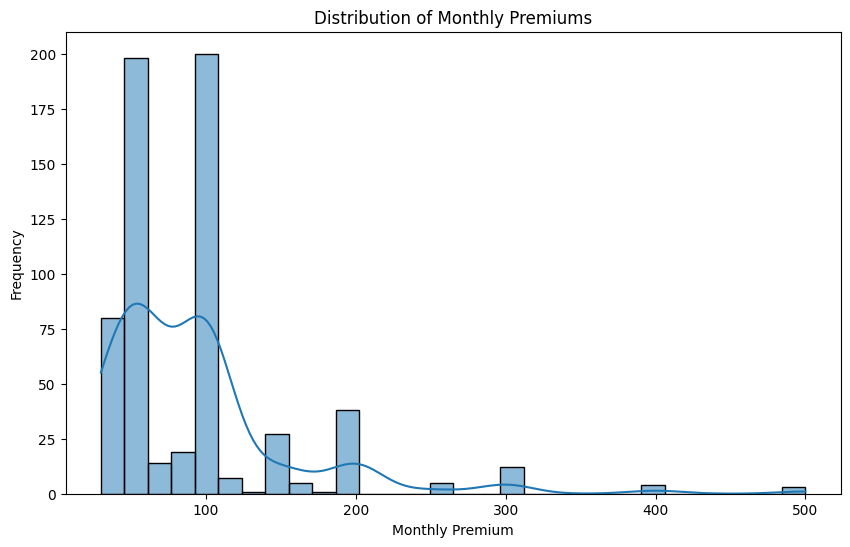

In [12]:
# Visualize the distribution of monthly premiums
plt.figure(figsize=(10, 6))
sns.histplot(df["monthly_premium"], bins=30, kde=True)
plt.title("Distribution of Monthly Premiums")
plt.xlabel("Monthly Premium")
plt.ylabel("Frequency")
plt.show()

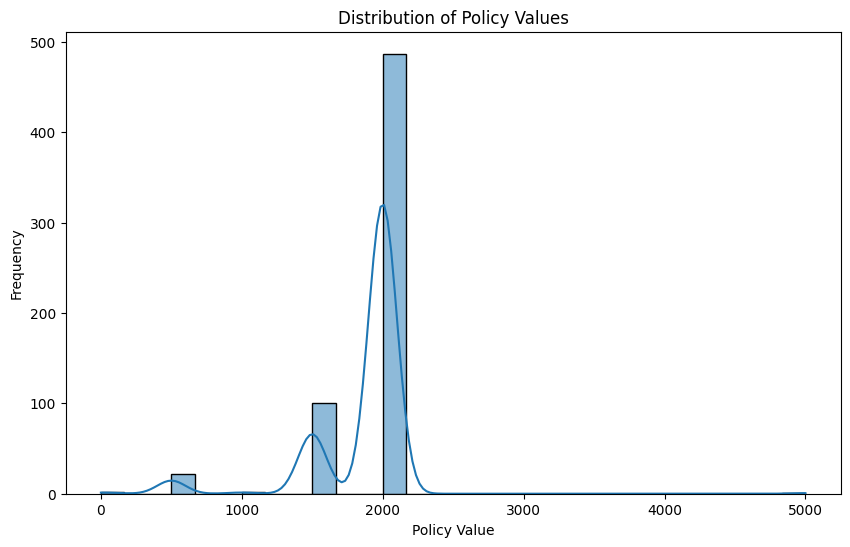

In [14]:
# Visualize the distribution of policy values
plt.figure(figsize=(10, 6))
sns.histplot(df["policy_value"], bins=30, kde=True)
plt.title("Distribution of Policy Values")
plt.xlabel("Policy Value")
plt.ylabel("Frequency")
plt.show()

In [13]:
# # Correlation matrix
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True)
# plt.title("Correlation Matrix")
# plt.show()

ValueError: could not convert string to float: 'UKS2023T03696'

<Figure size 1000x600 with 0 Axes>